
a.Remove punctuations, special characters and stopwords from the text column. Convert the text to lower case. 
b.Create two objects X and y. X will be the 'Tweets' column data frame and y will be the “Sentiment” column.
    1. Create a CountVectorizer object and split the data into training and testing sets. Train a MultinomialNB model and    Display the confusion Matrix
    2. Create a Tfidf object and split the data into training and testing sets. Train a MultinomialNB model and Display the confusion Matrix 
c.Compare tfidf and countvectorizer and mention the conclusion 
d.Display the POS tagging on the first 4 rows of ‘Tweets’ 

In [171]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools
import nltk

In [172]:
df=pd.read_csv(r'C:\Users\briju\Desktop\Mtech\Assignment\Data\Project6500.csv') #Reading and converting the dataset in to dataframe

In [173]:
df

,datetime,headline,ticker,sentiment
0,01/16/2020 05:25 AM,$MMM fell on hard times but could be set to re...,MMM,0
1,01/11/2020 06:43,Wolfe Research Upgrades 3M $MMM to ��Peer Perf...,MMM,1
2,01/09/2020 09:37,3M $MMM Upgraded to ��Peer Perform�� by Wolfe ...,MMM,1
3,01/08/2020 17:01,$MMM #insideday follow up as it also opened up...,MMM,1
4,01/08/2020 07:44,$MMM is best #dividend #stock out there and do...,MMM,0
...,...,...,...,...
9465,04/11/2019 01:24,$WMT - Walmart shifts to remodeling vs. new st...,WMT,1
9466,04/10/2019 06:05,Walmart INC $WMT Holder Texas Permanent School...,WMT,0
9467,04/09/2019 04:38,$WMT $GILD:3 Dividend Stocks Perfect for Retir...,WMT,1
9468,04/09/2019 04:30,Walmart expanding use of #robots to scan shelv...,WMT,1


In [174]:
#Making the data in more readable format
dt_list=[]
tt_list=[]
#df['datetime'] = pd.to_datetime(df['datetime'],format)
for i in df.datetime:
    try:
        dt=datetime.strptime(i, '%m/%d/%Y %I:%M %p')
        dt_list.append(dt.strftime('%d/%m/%Y'))
        tt_list.append(dt.strftime('%H:%M'))
    except ValueError:
        dt=datetime.strptime(i, '%m/%d/%Y %H:%M')
        
        dt_list.append(dt.strftime('%d/%m/%Y'))
        tt_list.append(dt.strftime('%H:%M'))

df['Date']=dt_list
df['Time']=tt_list
df.drop(columns=['datetime'],inplace=True)

In [175]:
df.head(5)

,headline,ticker,sentiment,Date,Time
0,$MMM fell on hard times but could be set to re...,MMM,0,16/01/2020,05:25
1,Wolfe Research Upgrades 3M $MMM to ��Peer Perf...,MMM,1,11/01/2020,06:43
2,3M $MMM Upgraded to ��Peer Perform�� by Wolfe ...,MMM,1,09/01/2020,09:37
3,$MMM #insideday follow up as it also opened up...,MMM,1,08/01/2020,17:01
4,$MMM is best #dividend #stock out there and do...,MMM,0,08/01/2020,07:44


In [176]:
y=df['sentiment']
X=df.drop(columns=['sentiment'])

In [177]:
def cleaning(text):
    #converting in to lowercase
    text_list=text.split()
    text1=[]
    for i in range(len(text_list)):
        text1.append(re.sub('[^A-Za-z]+', '', text_list[i]))
    text1=' '.join(text1)  #converting list in to string
    text1=" ".join(text1.split())  #for removing extra space 
    cleaned_text = text1.lower()
    return cleaned_text

    
    
def tokenization(text):
    #word tokenization
    tokenized_list=word_tokenize(text)
    return tokenized_list
    

def lemmatization(text):
    #using WordNet Lemmatizer
    lemme_list=[]
    lemmatizer = WordNetLemmatizer() 
    for i in text:
            lemme_list.append(lemmatizer.lemmatize(i,pos='v'))
    return lemme_list



stop_words = set(stopwords.words('english'))
def meaningful_words(text):
    #removing Stopwords
    m_list=[]
    for w in text:
        if w not in stop_words:
            m_list.append(w)
    return (' '.join(m_list))

In [178]:
hd=X.headline
for i in hd.index:
    hd[i]=meaningful_words(lemmatization(tokenization(cleaning(hd[i]))))  #appluing above function in dataset(cleaning the data)

In [179]:
#creating Tfidf Vector 
tfvector=TfidfVectorizer(stop_words="english",ngram_range=(1,3))
train_df_tf=tfvector.fit_transform(hd)
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split( train_df_tf, y, test_size=0.33, random_state=42)

#Multinomial Naive bayes Model
mnb_tf = MultinomialNB()
mnb_tf.fit(X_train_tf, y_train_tf)
pred_tf = mnb_tf.predict(X_test_tf)
score = metrics.accuracy_score(y_test_tf, pred_tf)

print("accuracy:   %0.3f" % score)

accuracy:   0.876


In [180]:
cm_tf = confusion_matrix(y_test_tf, pred_tf)
FN_tf = cm_tf[1][0]
TN_tf = cm_tf[0][0]
TP_tf = cm_tf[1][1]
FP_tf = cm_tf[0][1]
print("Confusion matirix for TF-IDF")
print(cm_tf)

Confusion matirix for TF-IDF
[[1006  331]
 [  57 1732]]


In [181]:
precision_tf=TP_tf/(TP_tf+FP_tf)
print("Precision:",precision_tf)
Recall_tf=TP_tf/(TP_tf+FN_tf)
print("Recall:",Recall_tf)
F1_Measure_tf= 2 * (precision_tf * Recall_tf) / (precision_tf + Recall_tf)
print("F-1_Score:",F1_Measure_tf)

Precision: 0.8395540475036355
Recall: 0.9681386249301286
F-1_Score: 0.8992731048805815


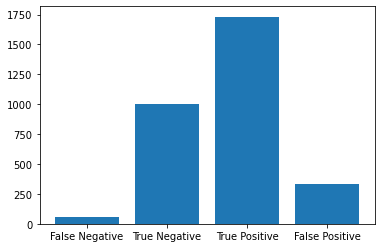

In [182]:
plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[FN_tf,TN_tf,TP_tf,FP_tf])
plt.show()

In [183]:
#Creating countvectorizer using Count vector
cv=CountVectorizer(stop_words="english", 
                                ngram_range=(1,3))
train_df_cv=cv.fit_transform(hd)
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split( train_df_cv, y, test_size=0.33, random_state=42)
#Multinomial Naive bayes for Count Vector
mnb_cv = MultinomialNB()
mnb_cv.fit(X_train_cv, y_train_cv)
pred_cv = mnb_cv.predict(X_test_cv)
score = metrics.accuracy_score(y_test_cv, pred_cv)
#print(min_df,max_df,analyzer,ngram_range,max_features)

print("accuracy:   %0.3f" % score)

accuracy:   0.903


In [184]:
cm = confusion_matrix(y_test_cv, pred_cv)
FN = cm[1][0]
TN = cm[0][0]
TP = cm[1][1]
FP = cm[0][1]
print("Confusion matirix for Count Vector")
print(cm)

Confusion matirix for Count Vector
[[1222  115]
 [ 188 1601]]


In [185]:
precision_cv=TP/(TP+FP)
print("Precision:",precision_cv)
Recall_cv=TP/(TP+FN)
print("Recall:",Recall_cv)
F1_Measure= 2 * (precision_cv * Recall_cv) / (precision_cv + Recall_cv)
print("F-1_Score:",F1_Measure)

Precision: 0.932983682983683
Recall: 0.8949133594186697
F-1_Score: 0.9135520684736091


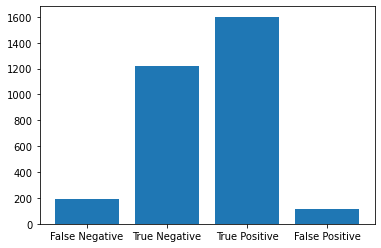

In [186]:
plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[FN,TN,TP,FP])
plt.show()

In [187]:
#POS_TAG
pos_tag_list=[]
for i  in range(4):
    text=df.loc[i,'headline']
    pos_tag_list.append(nltk.pos_tag(tokenization(cleaning(text))))
    
    
for i in range(4):
    print("Tweet_"+str(i+1)+":",pos_tag_list[i])
    print("-------------------------------------")

Tweet_1: [('mmm', 'NN'), ('fell', 'VBD'), ('on', 'IN'), ('hard', 'JJ'), ('times', 'NNS'), ('but', 'CC'), ('could', 'MD'), ('be', 'VB'), ('set', 'VBN'), ('to', 'TO'), ('rebound', 'VB'), ('soon', 'RB')]
-------------------------------------
Tweet_2: [('wolfe', 'JJ'), ('research', 'NN'), ('upgrades', 'NNS'), ('m', 'VBP'), ('mmm', 'NN'), ('to', 'TO'), ('peer', 'VB'), ('perform', 'NN')]
-------------------------------------
Tweet_3: [('m', 'NN'), ('mmm', 'NN'), ('upgraded', 'VBD'), ('to', 'TO'), ('peer', 'VB'), ('perform', 'NN'), ('by', 'IN'), ('wolfe', 'JJ'), ('research', 'NN'), ('stocks', 'NNS')]
-------------------------------------
Tweet_4: [('mmm', 'NN'), ('insideday', 'NN'), ('follow', 'VB'), ('up', 'RP'), ('as', 'IN'), ('it', 'PRP'), ('also', 'RB'), ('opened', 'VBD'), ('up', 'RP'), ('with', 'IN'), ('a', 'DT'), ('nice', 'JJ'), ('candle', 'NN'), ('that', 'WDT'), ('closed', 'VBD'), ('just', 'RB'), ('over', 'IN'), ('the', 'DT'), ('prior', 'JJ'), ('days', 'NNS'), ('high', 'JJ'), ('and', '

In [188]:
#From the above Accuracy result we can see 
#tfidf_accuracy value is accuracy:   0.876
#and Count vectorizer accuracy is accuracy:   0.903  which is more 
#but if we will check the Recall and Precision we found Precision is good in Count vectorizer and Recall is good in TFIDF 

TF-IDF
Precision: 0.8395540475036355
Recall: 0.9681386249301286
F-1_Score: 0.8992731048805815

Count Vectorizer
Precision: 0.932983682983683
Recall: 0.8949133594186697
F-1_Score: 0.9135520684736091


for sentiment analysis we cannot depend only on accuracy we have to check precision and Recall mostly for TF-IDF Recall is way better so in above two models we can say that TF-IDF is provding better results anyhow Count_vectorixer is giving high accuracy
